# Lab work 5
## Numerical integration

## 1. Rectangle method (Riemann sum)

Let $ f: I = [a,b] \rightarrow \mathbb R $ be our function and $ P = \{a = x_0, x_1 ... x_{n-1}, x_n = b \} $ be a partition of $I$  
A Rienmann sum $S$ of the function $f$ over the interval $I$ is defined as $ S = \sum\limits_{i=1}^{n} f(\xi_i) \Delta x_i $,  
where $ \Delta x_i = x_i - x_{i-1} $ and $ \xi_i \in [x_{i-1}, x_{i}] $  
and $ \int\limits^a_b f(x)dx \approx \sum\limits_{i=1}^{n} f(\xi_i) \Delta x_i $  
So, chosing the different $\xi_i$, we can make some formulas for numerical integration:  
1) $\xi_i = x_{i-1}$ - left rule: $ \int\limits^a_b f(x)dx \approx \sum\limits_{i=1}^{n} f(x_{i-1})(x_i-x_{i-1}) $  
2) $\xi_i = x_{i}$ - right rule: $ \int\limits^a_b f(x)dx \approx \sum\limits_{i=1}^{n} f(x_i)(x_i-x_{i-1}) $  
3) $\xi_i = x_{i-1/2} = \frac{x_i+x_{i-1}}{2} $ - midpoint rule: $ \int\limits^a_b f(x)dx \approx \sum\limits_{i=1}^{n} f(x_{i-1/2})(x_i-x_{i-1}) $ 

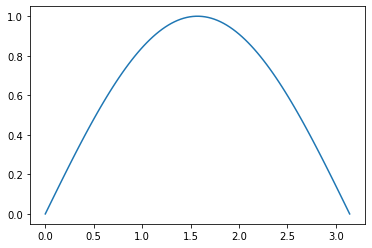

Real function
Left:  1.999832163893993
Right:  1.9998321638939929
Middle:  2.0000839191093354

Grid function
Left:  1.999832163893993
Right:  1.9998321638939929
Middle:  1.9998321638939924


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def leftRectFunc(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += func(x[i-1])*(x[i]-x[i-1])
    return sum

def leftRectGrid(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += func[i-1]*(x[i]-x[i-1])
    return sum

def rightRectFunc(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += func(x[i])*(x[i]-x[i-1])
    return sum

def rightRectGrid(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += func[i]*(x[i]-x[i-1])
    return sum

def midRectFunc(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += func((x[i]+x[i-1])/2)*(x[i]-x[i-1])
    return sum

def midRectGrid(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += (func[i]+func[i-1])/2*(x[i]-x[i-1])
    return sum

func = lambda x: np.sin(x)
a = 0
b = np.pi
n = 100

x = np.linspace(a, b, n)
f = func(x)
plt.plot(x, f)
plt.show()

print("Real function")
print("Left: ", leftRectFunc(x, func))
print("Right: ", rightRectFunc(x, func))
print("Middle: ", midRectFunc(x, func))
print("\nGrid function")
print("Left: ", leftRectGrid(x, f))
print("Right: ", rightRectGrid(x, f))
print("Middle: ", midRectGrid(x, f))

## 1.1 Accuracy

Order of accuracy =  2.0649834701423866


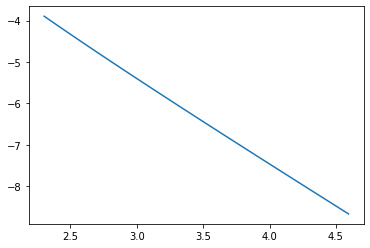

In [2]:
index = np.log([i for i in range(10, 100)])
value = np.log([abs(leftRectFunc(np.linspace(0, np.pi, i), func)-2) for i in range(10, 100)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 1.2 Runge amendment

The accuracy can be estimated by the next formula:
$$ \varepsilon = \Theta |I_{2n} - I_{n}|, $$  
where $ \Theta = \frac{1}{2^{p}-1} $,  $p$ is an order of accuracy, $I_n$ and $I_{2n}$ is a numerical value of integral with $n$ and $2n$ points accordingly  
So, the rectangle rule accuracy can be estimated as $$ \varepsilon = \frac{1}{3} |I_{2n} - I_{n}| $$

In [3]:
def Runge(n, a, b, p, func, method):
    x = np.linspace(a, b, n)
    x_2 = np.linspace(a, b, n//2)
    return abs(method(x, func) - method(x_2, func))/(2**(p)-1)


print("Real function")
print("Left: ", Runge(n, a, b, 2, func, leftRectFunc))
print("Right: ", Runge(n, a, b, 2, func, rightRectFunc))
print("Middle: ", Runge(n, a, b, 2, func, midRectFunc))
print("\nGrid function")
print("Left: ", Runge(n, a, b, 2, f, leftRectGrid))
print("Right: ", Runge(n, a, b, 2, f, rightRectGrid))
print("Middle: ", Runge(n, a, b, 2, f, midRectGrid))

Real function
Left:  0.0001724381899770311
Right:  0.00017243818997680904
Middle:  8.622461068489666e-05

Grid function
Left:  0.014566538313386168
Right:  0.006802150217326479
Middle:  0.003882194048029882


## 2. Simpson rule

Let's use Lagrange polynomial interpolation with second degree polynomial on the each interval. Then:
$$ I = \int\limits^b_a f(x)dx = \sum\limits_{i=1}^{n-1} I(i) $$
$$ I(i) = \int\limits_{x_i}^{x_{i+1}} L_2(x)dx $$
$$ L_2(x) = f_i l_i + f_{i+1/2} l_{i+1/2} + f_{i+1} l_{i+1} $$
If we substitute all variables, we will get the Simpson formula:
$$ I = \frac{1}{6} \sum\limits_{i=1}^{n-1} (f_i + 4f_{i+1/2} + f_{i+1})(x_{i+1}-x_i) $$

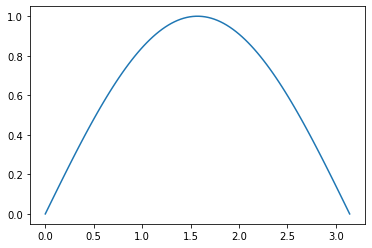

Real function
Integral =  2.000000000704222

Grid function
Integral =  1.999832163893993


In [4]:
def SimpsonFunc(x, func):
    n = len(x)
    sum = 0
    for i in range(n-1):
        sum += (func(x[i])+4*func((x[i]+x[i+1])/2)+func(x[i+1]))*(x[i+1]-x[i])/6
    return sum

def SimpsonGrid(x, func):
    n = len(x)
    sum = 0
    for i in range(n-1):
        sum += (func[i]+4*(func[i]+func[i+1])/2+f[i+1])*(x[i+1]-x[i])/6
    return sum

func = lambda x: np.sin(x)
a = 0
b = np.pi
n = 100

x = np.linspace(a, b, n)
f = func(x)
plt.plot(x, f)
plt.show()

print("Real function")
print("Integral = ", SimpsonFunc(x, func))
print("\nGrid function")
print("Integral = ", SimpsonGrid(x, f))

## 2.1 Accuracy

Order of accuracy =  4.129863037756942


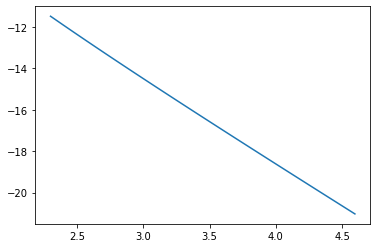

In [5]:
index = np.log([i for i in range(10, 100)])
value = np.log([abs(SimpsonFunc(np.linspace(0, np.pi, i), func)-2) for i in range(10, 100)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 2.2 Runge amendment

In [6]:
print("Real function: ", Runge(n, a, b, 4, func, SimpsonFunc))
print("\nGrid function: ", Runge(n, a, b, 4, f, SimpsonGrid))

Real function:  7.354261200021028e-10

Grid function:  0.000776438809606006


## 3. Trapezoidal rule

Let's approximate the function on the each interval as a linear function. Then we get a trapezoidal rule:
$$ I = \frac{1}{2} \sum\limits_{i=1}^{n-1} (f(x_i) + f(x_{i+1}))(x_{i+1}-x_i) $$

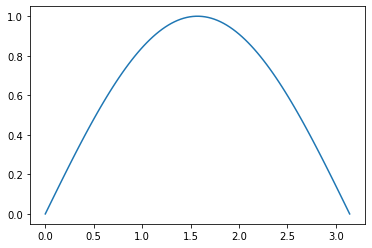

Real function
Integral =  1.9998321638939924

Grid function
Integral =  1.9998321638939924


In [7]:
def trapezoidFunc(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += (func(x[i])+func(x[i-1]))*(x[i]-x[i-1])/2
    return sum

def trapezoidGrid(x, func):
    n = len(x)
    sum = 0
    for i in range(1, n):
        sum += (func[i]+func[i-1])*(x[i]-x[i-1])/2
    return sum

func = lambda x: np.sin(x)
a = 0
b = np.pi
n = 100

x = np.linspace(a, b, n)
f = func(x)
plt.plot(x, f)
plt.show()

print("Real function")
print("Integral = ", trapezoidFunc(x, func))
print("\nGrid function")
print("Integral = ", trapezoidGrid(x, f))

## 3.1 Accuracy

Order of accuracy =  2.064983470142852


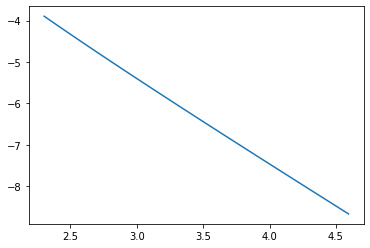

In [8]:
index = np.log([i for i in range(10, 100)])
value = np.log([abs(trapezoidFunc(np.linspace(0, np.pi, i), func)-2) for i in range(10, 100)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 3.2 Runge amendment

In [9]:
print("Real function: ", Runge(n, a, b, 2, func, trapezoidFunc))
print("\nGrid function: ", Runge(n, a, b, 2, f, trapezoidGrid))

Real function:  0.00017243818997666102

Grid function:  0.003882194048029882


## 4. Improper integral

An improrer integral can be estimated as:
$$ \int\limits^{\infty}_a f(x)dx = \int\limits^{A}_{a} f(x)dx + \int\limits^{\infty}_{A} f(x)dx $$
where $A$ is big enough to think $ \int\limits^{\infty}_{A} f(x)dx = \varepsilon $

Integral =  0.505464798448166


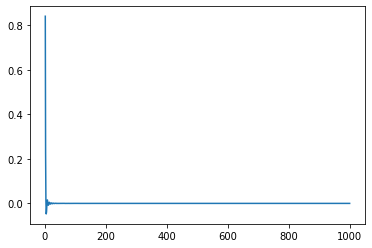

accuracy =  0.00139779844816601


In [11]:
def improper(a, A, n, func):
    x = np.linspace(a, A, n)
    return SimpsonFunc(x, func)
    
func = lambda x: np.sin(x) / x**2
a = 1
A = 1000
n = 1000
x = np.linspace(a, A, n)
I = improper(a, A, n, func)
print("Integral = ", I)
plt.plot(x, func(x))
plt.show()
print("accuracy = ", abs(0.504067 - I))